# **Background**

This is the German Credit Dataset, where it contains 1000 samples with 21 features. Of the 21 features, 14 are categorical and 7 of them are numeric. The column names are followed below according to the UCI Machine Learning Repository website:

- Attribute 1: Status of existing checking account (status)
- Attribute 2: Duration in month (duration)
- Attribute 3: Credit history (credit_history)
- Attribute 4:Purpose (purpose)
- Attribute 5: Credit amount (credit_amount)
- Attribute 6: Savings account/bonds (savings_account)
- Attribute 7: Present employment since (employment)
- Attribute 8: Installment rate in percentage of disposable income (installment_rate)
- Attribute 9: Personal status and sex (status_sex)
- Attribute 10: Other debtors / guarantors (guarantors)
- Attribute 11: Present residence since (residence)
- Attribute 12: Property (property)
- Attribute 13: Age in years (age)
- Attribute 14: Other installment plans (other_installment)
- Attribute 15: Housing (housing)
- Attribute 16: Number of existing credits at this bank (existing_credits)
- Attribute 17: Job (job)
- Attribute 18: Number of people being liable to provide maintenance for (maintainence_people)
- Attribute 19: Telephone (telephone)
- Attribute 20: Foreign worker (foreign)

# Import the Necessary Packages for the Module

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import warnings

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report,confusion_matrix

# Renaming the Columns on the Dataset

For this part, I am going to rename the dataset according to the variables that are given from the UCI Machine Learning repository website. 

In [7]:
#columns = ['status', 'duration', 'credit_history', 'purpose', 'credit_amount', 'savings_account', 'employment', 'installment_rate',
#          'status_sex', 'guarantors', 'residence', 'property', 'age', 'other_installments', 'housing', 'existing_credits', 'job', 'maintainence_people',
#          'telephone', 'foreign', 'rating']

# Reading the Dataset

In [6]:
gcredit = pd.read_csv('./germancredit.txt', sep='\s+', names=np.arange(1,22))
gcredit.head()

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [7]:
gcredit.shape

(1000, 21)

# Looking at Credit History Attributes

In [8]:
gcredit[3].value_counts()

A32    530
A34    293
A33     88
A31     49
A30     40
Name: 3, dtype: int64

# Looking for the Missing Data

In [9]:
gcredit.isnull().any()

1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
dtype: bool

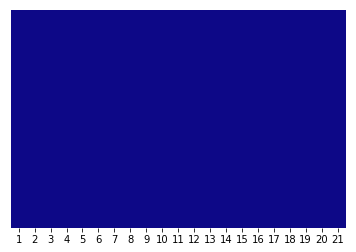

In [10]:
sns.heatmap(gcredit.isnull(),yticklabels=False,cbar=False,cmap='plasma')

As shown by using the missing data heatmap along with the isnull and any functions, it is shown that there are no missing information in the dataset.

# Gathering the Column Names to Determine if it is a Match

In [11]:
gcredit.columns

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
            20, 21],
           dtype='int64')

# Pair Plots

C:\Users\atse\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\atse\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


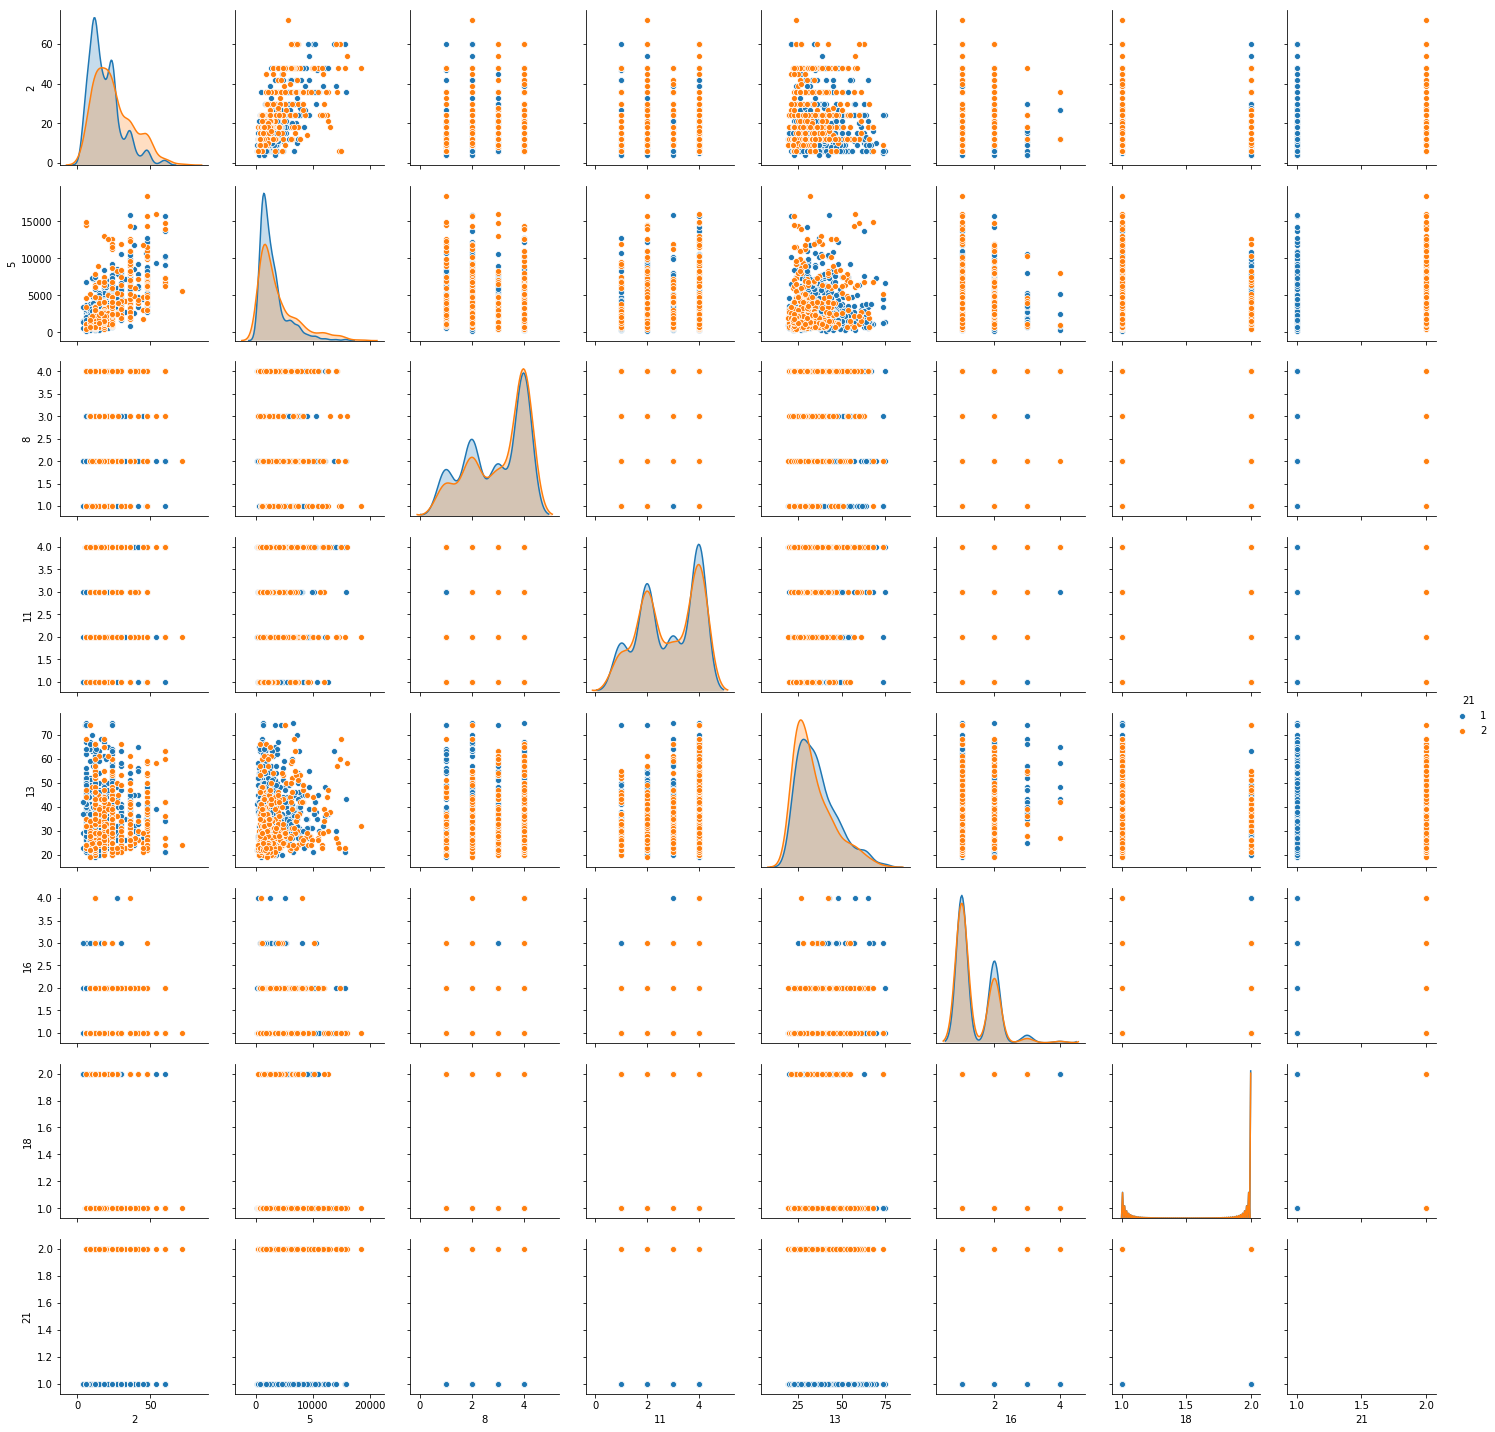

In [13]:
sns.pairplot(gcredit, hue = 21)

# Seperation to Other Columns

In [14]:
#category = ['other_installment', 'status', 'employment', 'savings_account', 'housing', 'property', 'foreign', 'telephone', 'job', 'purpose', 'status_sex', 'guarantors', 'credit_history', 'rating']
#numeric = ['age', 'residence', 'maintainence_people', 'duration', 'existing_credits', 'installment_rate', 'credit_amount']


These names are just to test if the analysis will run smooth. 

# Finding Correlation

In [12]:
gcredit.corr()

,2,5,8,11,13,16,18,21
2,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,0.214927
5,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,0.154739
8,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,0.072404
11,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,0.002967
13,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,-0.091127
16,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,-0.045732
18,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,-0.003015
21,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015,1.000000


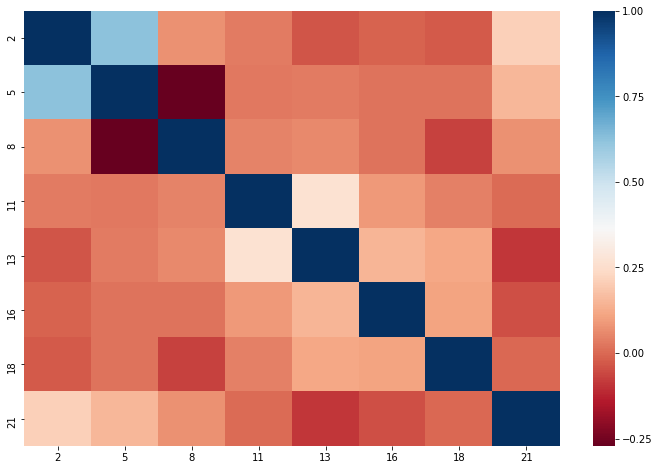

In [13]:
gcorr = gcredit.corr()
plt.figure(figsize=(12,8))
sns.heatmap(gcorr, 
        xticklabels=gcorr.columns,
        yticklabels=gcorr.columns,
        cmap="RdBu")
plt.show()

# Having A Select Set of Columns

In [14]:
obj_gcredit = gcredit.select_dtypes(include=['object']).copy()
obj_gcredit.head()

,1,3,4,6,7,9,10,12,14,15,17,19,20
0,A11,A34,A43,A65,A75,A93,A101,A121,A143,A152,A173,A192,A201
1,A12,A32,A43,A61,A73,A92,A101,A121,A143,A152,A173,A191,A201
2,A14,A34,A46,A61,A74,A93,A101,A121,A143,A152,A172,A191,A201
3,A11,A32,A42,A61,A74,A93,A103,A122,A143,A153,A173,A191,A201
4,A11,A33,A40,A61,A73,A93,A101,A124,A143,A153,A173,A191,A201


In [15]:
gcredit=pd.get_dummies(gcredit)
gcredit.head()

,2,5,8,11,13,16,18,21,1_A11,1_A12,...,15_A152,15_A153,17_A171,17_A172,17_A173,17_A174,19_A191,19_A192,20_A201,20_A202
0,6,1169,4,4,67,2,1,1,1,0,...,1,0,0,0,1,0,0,1,1,0
1,48,5951,2,2,22,1,1,2,0,1,...,1,0,0,0,1,0,1,0,1,0
2,12,2096,2,3,49,1,2,1,0,0,...,1,0,0,1,0,0,1,0,1,0
3,42,7882,2,4,45,1,2,1,1,0,...,0,1,0,0,1,0,1,0,1,0
4,24,4870,3,4,53,2,2,2,1,0,...,0,1,0,0,1,0,1,0,1,0


In [16]:
gcredit.corr().describe().head()

,2,5,8,11,13,16,18,21,1_A11,1_A12,...,15_A152,15_A153,17_A171,17_A172,17_A173,17_A174,19_A191,19_A192,20_A201,20_A202
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.033992,0.031536,0.013019,0.026555,0.028674,0.023080,0.019986,0.025245,0.005878,0.005719,...,-0.015999,0.027465,0.015040,-0.003824,-0.014659,0.018026,-0.014966,0.014966,0.006203,-0.006203
std,0.176770,0.191525,0.143219,0.157601,0.169973,0.168054,0.146283,0.159626,0.169185,0.162071,...,0.198041,0.203765,0.147484,0.176162,0.179784,0.186136,0.205401,0.205401,0.190375,0.190375
min,-0.242586,-0.276995,-0.271316,-0.297547,-0.212620,-0.540354,-0.203431,-0.322436,-0.495358,-0.489136,...,-0.735968,-0.548445,-0.195709,-0.652438,-0.652438,-0.543852,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.061301,-0.054532,-0.039832,-0.037491,-0.042097,-0.030328,-0.039227,-0.052713,-0.052367,-0.051370,...,-0.042118,-0.066792,-0.040391,-0.048109,-0.058739,-0.050377,-0.077388,-0.047174,-0.035506,-0.051000


# Scaling the Data and Dropping the Irrelevant Columns

In [17]:
scaler=StandardScaler()
scaler.fit(gcredit.drop(21,axis=1))
gcredit_scaled=scaler.transform((gcredit.drop(21,axis=1)))

/home/atse/miniconda3/envs/chatbot/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/atse/miniconda3/envs/chatbot/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


# Performing PCA

<bound method IndexOpsMixin.value_counts of 0      1
1      2
2      1
3      1
4      2
5      1
6      1
7      1
8      1
9      2
10     2
11     2
12     1
13     2
14     1
15     2
16     1
17     1
18     2
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     2
      ..
970    1
971    1
972    2
973    2
974    1
975    1
976    1
977    1
978    2
979    2
980    2
981    2
982    1
983    2
984    1
985    1
986    1
987    1
988    1
989    1
990    1
991    1
992    1
993    1
994    1
995    1
996    1
997    1
998    2
999    1
Name: 21, Length: 1000, dtype: int64>

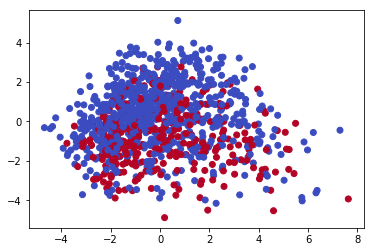

In [19]:
pca = PCA(n_components=6)
pca.fit(gcredit_scaled)
pca_x=pca.transform(gcredit_scaled)
gcredit_scaled.shape
pca_x.shape
plt.figure()
plt.scatter(pca_x[:,0],pca_x[:,1],c=gcredit[21], cmap = 'coolwarm')
gcredit[21].value_counts

For this part of the analysis, I have decided to gather six components using PCA before training and testing the dataset. From there, I have decided to start building the models from there. I have used a range of principal components from 0 to 10, and 6 is the most optimal number of components to use. 

# Getting the First Set of Variance Ratio

In [20]:
print(pca.explained_variance_ratio_)

[0.06842054 0.04747657 0.04620451 0.04007988 0.03513145 0.03436572]


# Gathering the Singular Values

In [22]:
print(pca.singular_values_)

[64.60381519 53.81515208 53.08931329 49.44565465 46.29274816 45.78546908]


# Performing Train Test Split

In [24]:
gcredit_new=pd.DataFrame(pca_x, columns=['c1','c2','c3','c4','c5','c6'])
gcredit_new['Target']=gcredit[21]
gcredit_new.head()
#X=new_dataframe.drop(new_dataframe['Target'], axis=1)
#X=new_dataframe.drop(new_dataframe['Target'],axis=1)
X=gcredit_new.iloc[:, :-1].values
y=gcredit_new['Target']
y

0      1
1      2
2      1
3      1
4      2
5      1
6      1
7      1
8      1
9      2
10     2
11     2
12     1
13     2
14     1
15     2
16     1
17     1
18     2
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     2
      ..
970    1
971    1
972    2
973    2
974    1
975    1
976    1
977    1
978    2
979    2
980    2
981    2
982    1
983    2
984    1
985    1
986    1
987    1
988    1
989    1
990    1
991    1
992    1
993    1
994    1
995    1
996    1
997    1
998    2
999    1
Name: Target, Length: 1000, dtype: int64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=174)

# K-Nearest Neighbors

In [26]:
knn = KNeighborsClassifier(n_neighbors=30)

In [27]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=30, p=2,
           weights='uniform')

In [28]:
pred = knn.predict(X_test)

In [29]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.78      0.92      0.84       150
           2       0.45      0.20      0.28        50

   micro avg       0.74      0.74      0.74       200
   macro avg       0.61      0.56      0.56       200
weighted avg       0.70      0.74      0.70       200



In [30]:
knn_res = confusion_matrix(y_test,pred)
pd.DataFrame(knn_res)

,0,1
0,138,12
1,40,10


In [31]:
accuracy_score(y_pred = knn.predict(X_test), y_true = y_test)

0.74

# Decision Tree

In [32]:
dectree = DecisionTreeClassifier()
dectree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [33]:
pred = dectree.predict(X_test)

In [34]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.78      0.73      0.75       150
           2       0.32      0.38      0.35        50

   micro avg       0.64      0.64      0.64       200
   macro avg       0.55      0.55      0.55       200
weighted avg       0.66      0.64      0.65       200



In [35]:
decision_tr = confusion_matrix(y_test,pred)
pd.DataFrame(decision_tr)

,0,1
0,109,41
1,31,19


In [36]:
accuracy_score(y_pred = dectree.predict(X_test), y_true = y_test)

0.64

# Random Forest Classifier

In [37]:
grf = RandomForestClassifier(n_estimators=600)

In [38]:
grf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [39]:
grf_pred=grf.predict(X_test)

In [40]:
print(classification_report(y_test,grf_pred))

              precision    recall  f1-score   support

           1       0.80      0.85      0.82       150
           2       0.44      0.34      0.38        50

   micro avg       0.72      0.72      0.73       200
   macro avg       0.62      0.60      0.60       200
weighted avg       0.71      0.72      0.71       200



In [41]:
rfc = confusion_matrix(y_test,grf_pred)
pd.DataFrame(rfc)

,0,1
0,128,22
1,33,17


In [42]:
accuracy_score(y_pred = grf.predict(X_test), y_true = y_test)

0.725

# Using Naive Bayes

In [43]:
gnb_model = GaussianNB()

In [44]:
gnb_model.fit(X, y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [45]:
pred_y = gnb_model.predict(X_test)

In [46]:
print(classification_report(y_test,pred_y))

              precision    recall  f1-score   support

           1       0.80      0.88      0.84       150
           2       0.47      0.32      0.38        50

   micro avg       0.74      0.74      0.74       200
   macro avg       0.63      0.60      0.61       200
weighted avg       0.71      0.74      0.72       200



In [47]:
nbb = confusion_matrix(y_test,pred_y)
pd.DataFrame(nbb)

,0,1
0,132,18
1,34,16


In [48]:
accuracy_score(y_pred = gnb_model.predict(X_test), y_true = y_test)

0.74

# K-Means Clustering

In [49]:
gkm = KMeans(n_clusters = 4)
gkm.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [50]:
km_gcredit = confusion_matrix(gkm.predict(X_test), y_test)
pd.DataFrame(km_gcredit)

,0,1,2,3
0,0,17,8,0
1,0,72,14,0
2,0,39,23,0
3,0,22,5,0


In [51]:
accuracy_score(y_pred = gkm.predict(X_test), y_true = y_test)

0.475

It has been determined by comparison, supervised learning is far more accurate than unsupervised learning.